In [1]:
import cv2
import mediapipe as mp
import pandas as pd
import re
import time
from PIL import Image

import numpy as np

df = pd.DataFrame()
frames = []

In [2]:
BaseOptions = mp.tasks.BaseOptions
HandLandmarker = mp.tasks.vision.HandLandmarker
HandLandmarkerOptions = mp.tasks.vision.HandLandmarkerOptions
VisionRunningMode = mp.tasks.vision.RunningMode


options = HandLandmarkerOptions(
    base_options=BaseOptions(model_asset_path='hand_landmarker.task'),
    running_mode=VisionRunningMode.IMAGE,
    num_hands=2,
)
hands = HandLandmarker.create_from_options(options)


INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


In [3]:
import os
import copy
path = os.getcwd()

In [4]:
import math
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

# Convert normalized coordinates to Matplotlib-compatible coordinates
def convert_to_matplotlib_coords(coord, image_height):
    x, y = coord
    return x, image_height - y

def normalize_coordinates(coordinates, target):
    max_x = max(coord[0] for coord in coordinates)
    max_y = max(coord[1] for coord in coordinates)
    
    normalized_coordinates = []
    for x, y in coordinates:
        normalized_x = (x / max_x)
        normalized_y = (y / max_y)
        normalized_coordinates.append([normalized_x, normalized_y])
    
    # Convert coordinates for plotting
    # matplotlib_coords = [convert_to_matplotlib_coords(coord, image_height) for coord in normalized_coordinates]
    if(target == "l"):
        visualize_data(normalized_coordinates, target)
    return normalized_coordinates

def visualize_data(normalized_coordinates, target):
    # Unzip normalized coordinates for plotting
    normalized_x, normalized_y = zip(*normalized_coordinates)
    
    # Plot the normalized coordinates
    plt.figure(figsize=(8, 6))
    plt.scatter(normalized_x, normalized_y, color='blue', label='Normalized Coordinates')
    plt.xlabel('Normalized X')
    plt.xlabel('Normalized X')
    plt.ylabel('Normalized Y')
    plt.title('Normalized Coordinates Plot')
    plt.legend(target)
    plt.grid(True)
    plt.show()

In [5]:
def extract_video(name, target, sequence_id):
    global frames

    # Load an image from file

    image = cv2.imdecode(np.fromfile(name, np.uint8), cv2.IMREAD_UNCHANGED)
    mp_image = mp.Image.create_from_file(name)
    hand_landmarker_result = hands.detect(mp_image)

    # Check if the image was loaded successfully
    if mp_image is not None:
        # Convert the BGR frame to RGB
        rgb_frame = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            
        if len(hand_landmarker_result.handedness) > 0:
            row_data = {
                "sequence_id": sequence_id,
                "target": target,
                "file": name
            }
            
            hand_sides = ["Left", "Right"]
            for idx, landmarks in enumerate(hand_landmarker_result.hand_landmarks):
                detected_pixels = []
                hand_side = hand_sides[idx]
                # Iterate through detected hand landmarks
                for landmark_idx, landmark in enumerate(landmarks):
                    x, y = landmark.x, landmark.y
                    detected_pixels.append([x, y])

                    # Draw circles on the frame
                    cv2.circle(image, (int(x * image.shape[1]), int(y * image.shape[0])), 5, (0, 255, 0), -1)

                detected_pixels = normalize_coordinates(detected_pixels, target)
                for i in range(len(detected_pixels)):
                    x, y = detected_pixels[i]
                    row_data[f'x_{hand_side}_hand_{i}'] =  x
                    row_data[f'y_{hand_side}_hand_{i}'] =  y

            if (target == "l"):
                cv2.imshow('Original', image)
                cv2.waitKey(0)
                

            frames.append(row_data)
        
    else:
        print("Failed to load image.")

    cv2.destroyAllWindows()

In [6]:
import glob, os
import time
os.chdir("/Users/andreaamaya/Trabajo/megaproyecto_model/data/asl_letters_lensegua_c")

In [7]:
for file in glob.glob("*"):
    if (file.split(".")[-1] != "png"):
        splitted_name = file.split(".")[:-1]
        splitted_name.append(".png")
        renamed_format = "".join(splitted_name)

        im = Image.open(file)
        im.save(renamed_format)

        os.remove(file)


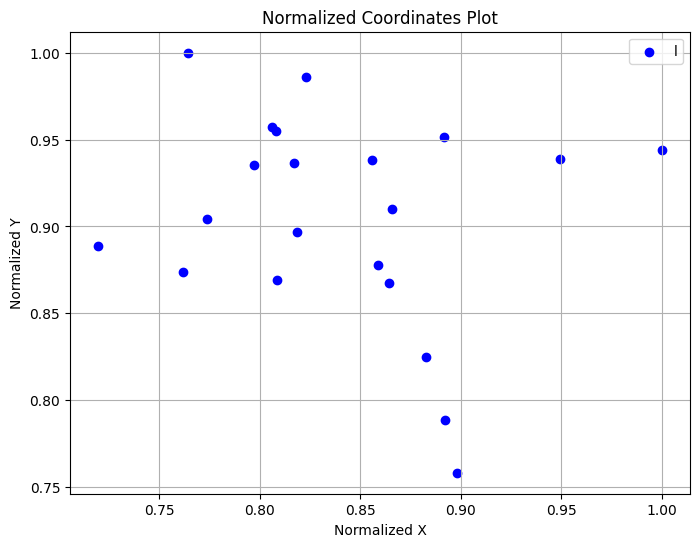

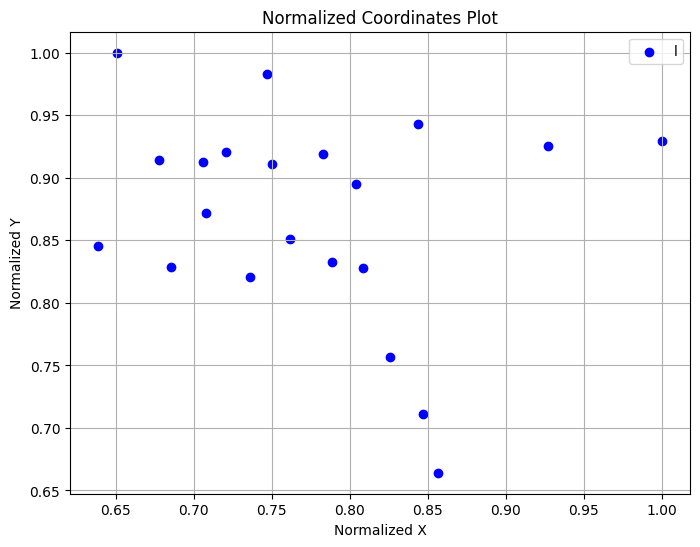

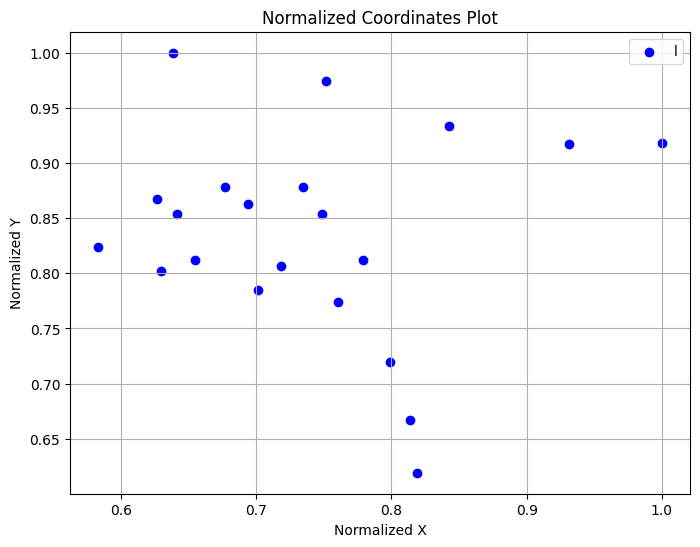

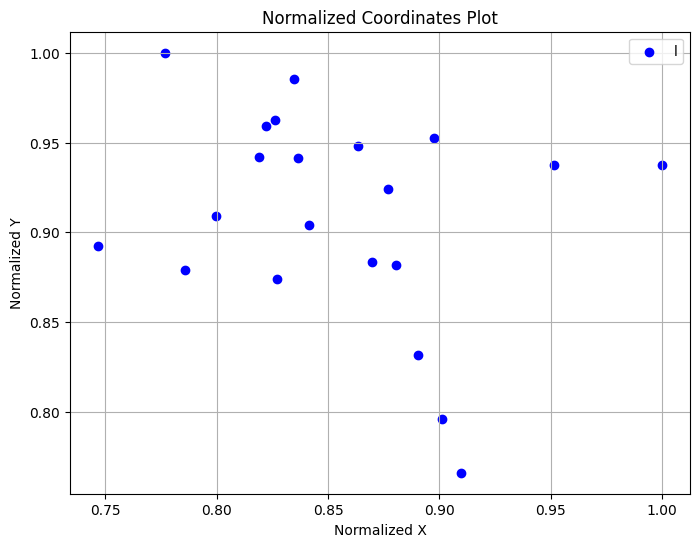

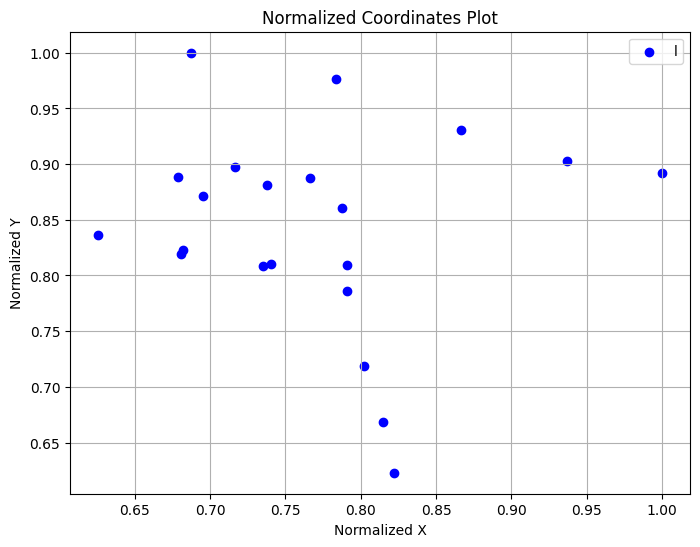

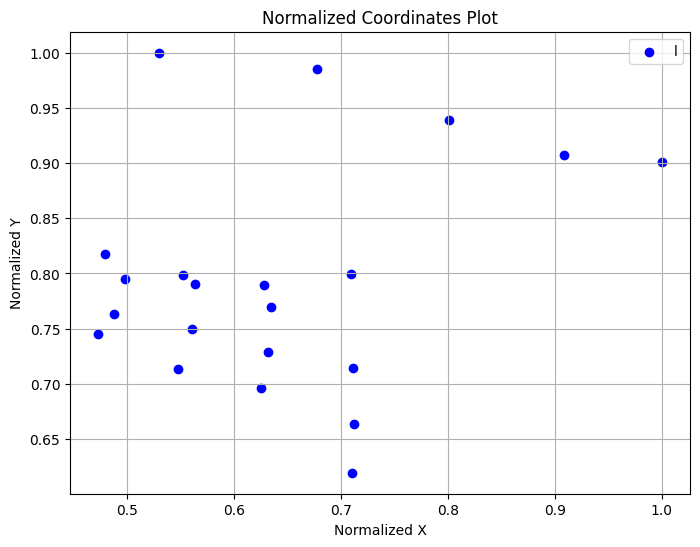

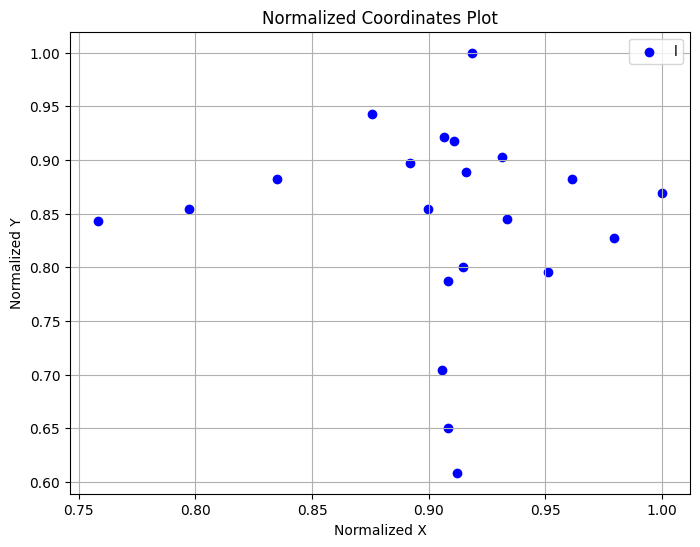

In [8]:
sequence_id = 0
for file in glob.glob("*.png"):
    sequence_id += 1
    name = " ".join(file.split(" ")[:-1])

    if (len(file.split(" ")) == 1):
        name = file.split(".")[0]

    extract_video(file, name, sequence_id)

In [9]:
df = pd.DataFrame(frames)

In [10]:
df['sequence_id'] = df['sequence_id'].astype(int)

In [11]:
df = df.sample(frac=1)

In [12]:
len(df)

183

In [13]:
df.head()

,sequence_id,target,file,x_Left_hand_0,y_Left_hand_0,x_Left_hand_1,y_Left_hand_1,x_Left_hand_2,y_Left_hand_2,x_Left_hand_3,...,x_Right_hand_16,y_Right_hand_16,x_Right_hand_17,y_Right_hand_17,x_Right_hand_18,y_Right_hand_18,x_Right_hand_19,y_Right_hand_19,x_Right_hand_20,y_Right_hand_20
147,148,q,q (7).png,1.000000,1.000000,0.868182,0.914128,0.820478,0.846905,0.774492,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
181,182,i,i (4).png,0.801343,1.000000,0.795936,0.950029,0.802861,0.893534,0.821283,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28,29,a,a (7).png,0.774669,0.981013,0.805534,0.934525,0.873408,0.883454,0.908579,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
144,145,u,u (5).png,0.716703,1.000000,0.843178,0.945552,0.911234,0.847170,0.910536,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,z,z (2).png,0.844270,1.000000,0.965270,0.952916,1.000000,0.883615,0.934592,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
len(df.columns)

87

In [15]:
validation_path = "/Users/andreaamaya/Trabajo/megaproyecto_model/data" + "/validation_letters.csv"

import random

grouped = df.groupby('target')
selected_validation_ids = []
for group_name, group_indices in grouped.groups.items():
    ids = list(set(df.loc[group_indices]['sequence_id'].values))
    if (len(ids) < 0):
        raise ("Error")
    selected_validation_ids.append(random.choice(ids))

print(selected_validation_ids)
validation_df = df[df['sequence_id'].isin(selected_validation_ids)][["sequence_id", "target", "file"]]
validation_df.to_csv(validation_path, index=False)

[84, 89, 171, 47, 19, 158, 135, 107, 71, 38, 103, 173, 13, 79, 131, 33, 23, 128, 86, 35, 174, 177, 168]


In [16]:
past_result = [29, 161, 119, 87, 27, 160, 36, 142, 61, 105, 120, 45, 153, 93, 78, 33, 23, 82, 48, 66, 75, 116, 168]
print(past_result == selected_validation_ids)

False


In [17]:
train_path = "/Users/andreaamaya/Trabajo/megaproyecto_model/data" + "/train_letters.csv"
train_df = df[~df['sequence_id'].isin(selected_validation_ids)][["sequence_id", "target", "file"]]
train_df.to_csv(train_path, index=False)

In [18]:
dir_data = "/Users/andreaamaya/Trabajo/megaproyecto_model/data" + "/data_letters.csv"
df_final = df.drop("file", axis=1)
df_final.to_csv(dir_data, index=False)